In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="import"></a>
# <center>Import Need Modules</center>

In [3]:
# CNN
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img, img_to_array
import numpy as np

#dataset with preprocessing


### 1- preprocessing the training set

In [4]:
train_data_generation = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
training_set = train_data_generation.flow_from_directory('/content/drive/MyDrive/autism/train',
                                                         target_size=(224, 224),
                                                         batch_size=64,
                                                         class_mode='binary')


Found 2526 images belonging to 2 classes.


### 2- preprocessing the testing set

In [5]:
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/autism/test',
                                           
                                                       target_size=(224, 224),
                                                       batch_size=64,
                                                       class_mode='binary')


Found 200 images belonging to 2 classes.


### 3- preprocessing the validation set

In [6]:
valid_data_generation = ImageDataGenerator(rescale=1./255)
valid_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/autism/valid',
                                                       target_size=(224, 224),
                                                       batch_size=64,
                                                       class_mode='binary')

Found 200 images belonging to 2 classes.


In [7]:
training_set.class_indices

{'autistic': 0, 'non_autistic': 1}

# creating the convolutional neural network layers

In [8]:
model = Sequential([

     # adding the first layer
    Conv2D(filters=256, kernel_size=3, activation='relu', input_shape=[224, 224, 3]),
    MaxPool2D(pool_size=2, strides=2),

    # adding the first layer
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the second layer
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

        # adding the second layer
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the third layer
    Flatten(),

    # full connection
    Dense(units=128, activation='relu'),

    # output layer
    Dense(units=1, activation='sigmoid')

])

In [9]:
# let's look at the structure of the model we just created
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [10]:
# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [11]:
#fitting the model
modelx=model.fit(x=training_set, validation_data=valid_set, epochs=30)

Epoch 1/30
40/40 [==============================] - 337s 8s/step - loss: 0.6965 - accuracy: 0.5095 - val_loss: 0.6909 - val_accuracy: 0.5950
Epoch 2/30
40/40 [==============================] - 42s 1s/step - loss: 0.6702 - accuracy: 0.6002 - val_loss: 0.7882 - val_accuracy: 0.5400
Epoch 3/30
40/40 [==============================] - 42s 1s/step - loss: 0.6391 - accuracy: 0.6275 - val_loss: 0.5965 - val_accuracy: 0.6450
Epoch 4/30
40/40 [==============================] - 41s 1s/step - loss: 0.5824 - accuracy: 0.7015 - val_loss: 0.5825 - val_accuracy: 0.6900
Epoch 5/30
40/40 [==============================] - 43s 1s/step - loss: 0.5466 - accuracy: 0.7284 - val_loss: 0.5680 - val_accuracy: 0.7250
Epoch 6/30
40/40 [==============================] - 41s 1s/step - loss: 0.5325 - accuracy: 0.7332 - val_loss: 0.6109 - val_accuracy: 0.7100
Epoch 7/30
40/40 [==============================] - 42s 1s/step - loss: 0.5153 - accuracy: 0.7565 - val_loss: 0.5979 - val_accuracy: 0.6900
Epoch 8/30
40/40 [=

In [12]:
model.evaluate(training_set)

40/40 [==============================] - 36s 905ms/step - loss: 0.2806 - accuracy: 0.8812


[0.28058144450187683, 0.8812351822853088]

In [13]:
model.evaluate(valid_set)

4/4 [==============================] - 1s 257ms/step - loss: 0.5286 - accuracy: 0.7400


[0.5286292433738708, 0.7400000095367432]

In [14]:
model.evaluate(testing_set)

4/4 [==============================] - 28s 9s/step - loss: 0.3363 - accuracy: 0.8750


[0.33632904291152954, 0.875]

In [19]:
model.save('best_train_875.h5')

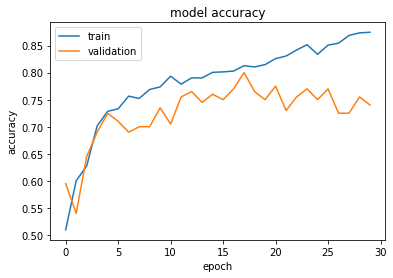

In [16]:
# summarize history for accuracy
plt.plot(modelx.history['accuracy'])
plt.plot(modelx.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

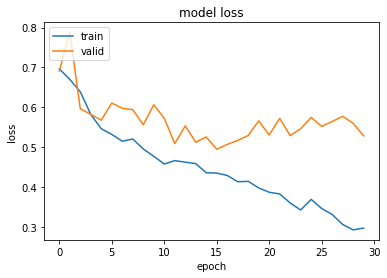

In [17]:
# summarize history for loss
plt.plot(modelx.history['loss'])
plt.plot(modelx.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#Try Transfer learning models

Resnet152v2

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),])

base_modela = keras.applications.resnet_v2.ResNet152V2(
    weights="ResNet152V2",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_modela.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_modela(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
modela = keras.Model(inputs, outputs)

modela.summary()

ValueError: ignored

In [ ]:
modela.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model_a=modela.fit(training_set,validation_data=valid_set, epochs=epochs)

In [ ]:
modela.evaluate(training_set)

In [ ]:
modela.evaluate(valid_set)

In [ ]:
modela.evaluate(testing_set)

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model_a.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_a.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_a.history["binary_accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model_a.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
# summarize history for accuracy
plt.plot(model_a.history['binary_accuracy'])
plt.plot(model_a.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(model_a.history['loss'])
plt.plot(model_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

save model weights

In [ ]:
#modela.save('best_train_83.h5')

In [ ]:
#Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
modela.trainable = True
modela.summary()

modela.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
modela1=modela.fit(training_set,validation_data=valid_set, epochs=epochs)

In [ ]:
modela.evaluate(training_set)

In [ ]:
modela.evaluate(valid_set)

In [ ]:
modela.evaluate(testing_set)

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), modela1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modela1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modela1.history["binary_accuracy"], label="train_acc")
plt.plot(np.arange(0, N), modela1.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
#modela.save('best_unfreeze_train_93.h5')

Inception v3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='softmax')(x)

# this is the model we will train
modelin = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
modelin.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy')

# train the model on the new data for a few epochs
epochs = 20
historyin=modelin.fit(training_set,validation_data=valid_set, epochs=epochs)




In [ ]:
modelin.evaluate(training_set)

In [ ]:
modelin.evaluate(valid_set)

In [ ]:
modelin.evaluate(testing_set)

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)

In [ ]:
modela.evaluate(test_images,test_labels)

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model_a.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_a.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_a.history["binary_accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model_a.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

just focus on the graphs

In [ ]:
# summarize history for accuracy
plt.plot(model_a.history['binary_accuracy'])
plt.plot(model_a.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(model_a.history['loss'])
plt.plot(model_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

save model weights

In [ ]:
#modela.save('best_train_83.h5')

In [ ]:
#Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
modela.trainable = True
modela.summary()

modela.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
modela1=modela.fit(train_images,train_labels,validation_data=(x_valid,y_valid.iloc[0:1000, :]), epochs=epochs)

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), modela1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modela1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modela1.history["binary_accuracy"], label="train_acc")
plt.plot(np.arange(0, N), modela1.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
modela.save('best_unfreeze_train_93.h5')

ajbhqcvq

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms

In [ ]:
model_ft = models.alexnet(pretrained=True)
model_ft.fc = nn.Linear(4096, 3)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)

In [ ]:
#saving the model
#model.save('CNN_autism_78train_86test.h5')

In [ ]:
#!jupyter nbconvert  --to HTML /content/Copy_of_CNN_autism.ipynb